In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df =  pd.read_csv('customer_segmentation_data.csv')

In [3]:
df

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [5]:
df['income'] = df['income'].astype(float).round(2).apply(lambda x: f'{x:.2f}')

In [6]:
df.describe()

,id,age,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,100.000000,10.00000,50.000000,999.740000


---

In [21]:
mean_age = df['age'].mean()
mean_age

43.783

In [23]:
mean_spending_score = df['spending_score'].mean()
mean_spending_score

50.685

In [32]:
max_membership_years = len(df[df['membership_years']>5])
max_membership_years

482

---

In [76]:
bins=[18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

C:\Users\leona\AppData\Local\Temp\ipykernel_9660\3925090761.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_group_purchase_frequency = df[['age_group', 'purchase_frequency']].groupby('age_group').agg({'purchase_frequency':'mean'}).reset_index()


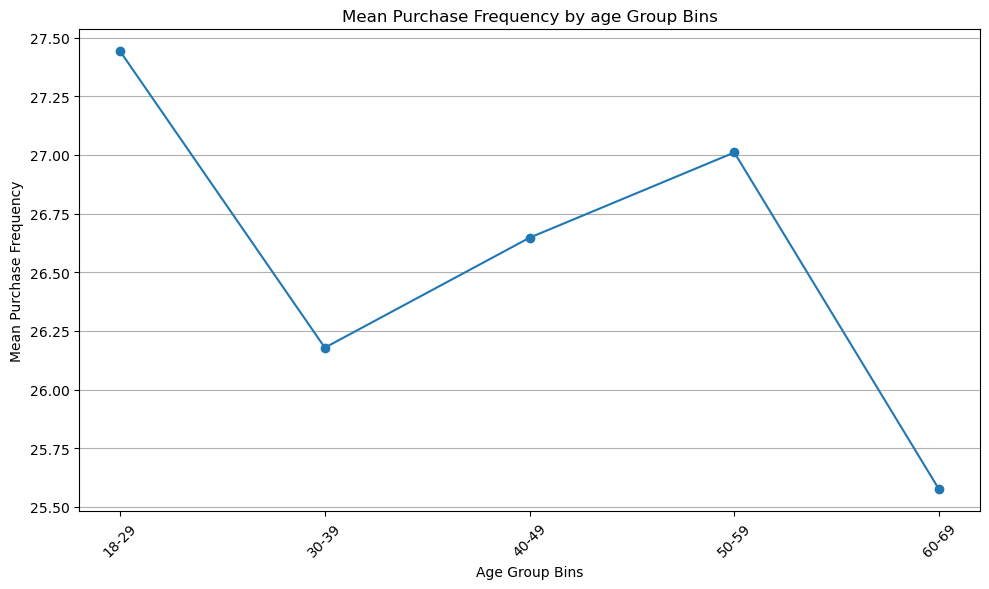

  age_group  purchase_frequency
0     18-29           27.441964
1     30-39           26.178771
2     40-49           26.647343
3     50-59           27.010526
4     60-69           25.575000


In [91]:
frequency_group_purchase_frequency = df[['age_group', 'purchase_frequency']].groupby('age_group').agg({'purchase_frequency':'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(frequency_group_purchase_frequency['age_group'], frequency_group_purchase_frequency['purchase_frequency'], marker='o', linestyle='-')
plt.xlabel('Age Group Bins')
plt.ylabel('Mean Purchase Frequency')
plt.title('Mean Purchase Frequency by age Group Bins')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

print(frequency_group_purchase_frequency)

In [81]:
bins_2 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels_2 = ['1-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

df['group_spending'] = pd.cut(df['spending_score'], bins=bins_2, labels=labels_2, right=False)

C:\Users\leona\AppData\Local\Temp\ipykernel_9660\4220638242.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_most_spending = df.groupby('group_spending').agg({'last_purchase_amount':'mean'}).reset_index()


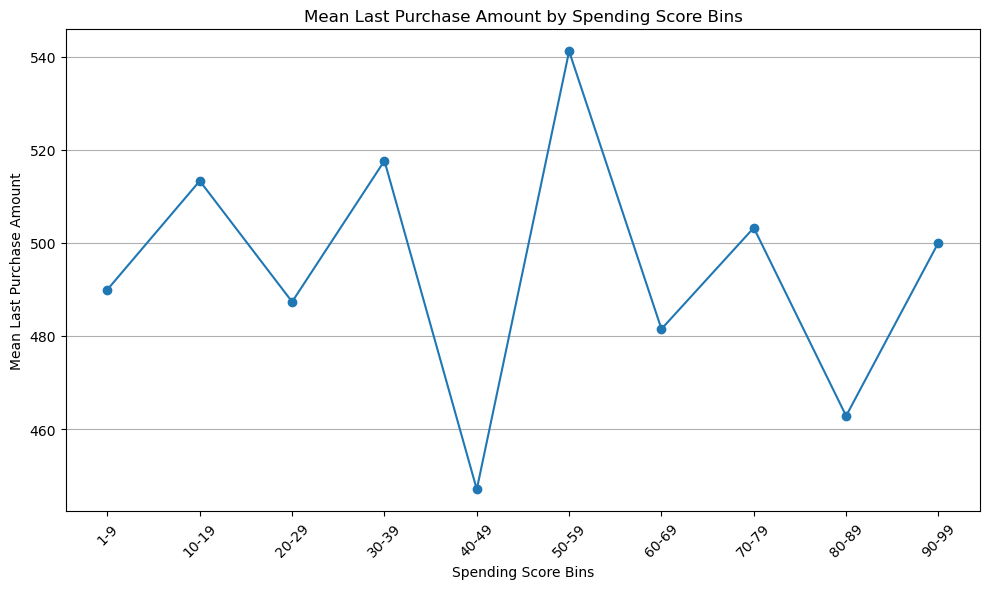

  group_spending  last_purchase_amount
0            1-9            489.985000
1          10-19            513.330495
2          20-29            487.344865
3          30-39            517.662340
4          40-49            447.034653
5          50-59            541.198795
6          60-69            481.503125
7          70-79            503.251953
8          80-89            462.819891
9          90-99            500.079011


In [92]:
group_most_spending = df.groupby('group_spending').agg({'last_purchase_amount':'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(group_most_spending['group_spending'], group_most_spending['last_purchase_amount'], marker='o', linestyle='-')
plt.xlabel('Spending Score Bins')
plt.ylabel('Mean Last Purchase Amount')
plt.title('Mean Last Purchase Amount by Spending Score Bins')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

print(group_most_spending)

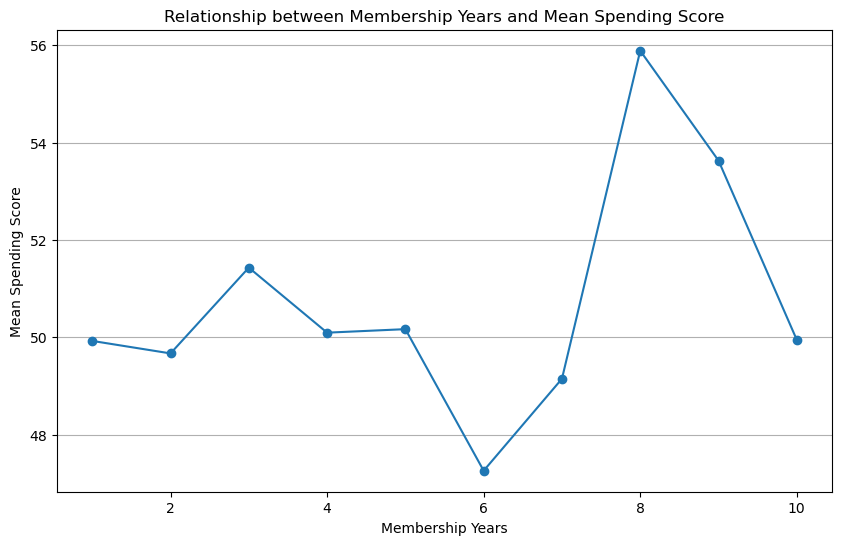

   membership_years  spending_score
0                 1       49.926316
1                 2       49.669725
2                 3       51.431579
3                 4       50.095745
4                 5       50.168000
5                 6       47.260417
6                 7       49.148936
7                 8       55.886364
8                 9       53.629630
9                10       49.947917


In [93]:
group_membership_most_spending = df.groupby('membership_years').agg({'spending_score':'mean'}).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(group_membership_most_spending['membership_years'], group_membership_most_spending['spending_score'], marker='o')
plt.xlabel('Membership Years')
plt.ylabel('Mean Spending Score')
plt.title('Relationship between Membership Years and Mean Spending Score')
plt.grid(True, axis='y')
plt.show()

print(group_membership_most_spending)

---

In [97]:
df['intercept'] = 1

X = df[['intercept','age', 'spending_score', 'membership_years']]
y = df['purchase_frequency']

In [98]:
model = sm.OLS(y, X)
results = model.fit()

In [99]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     purchase_frequency   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.923
Date:                Tue, 16 Jul 2024   Prob (F-statistic):              0.124
Time:                        14:47:05   Log-Likelihood:                -4071.9
No. Observations:                1000   AIC:                             8152.
Df Residuals:                     996   BIC:                             8171.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           25.8153      1.794  

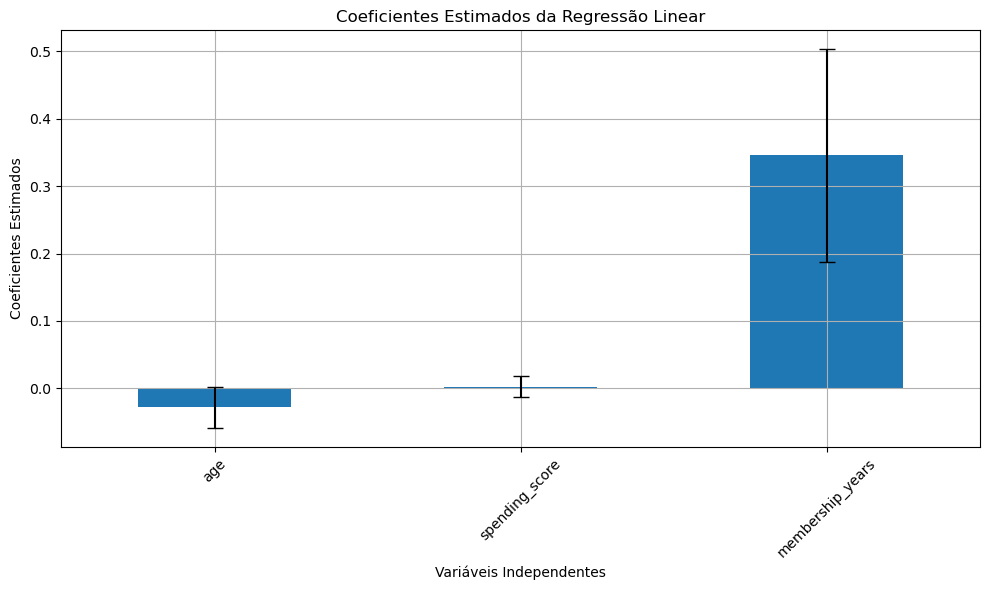

In [100]:
# Coeficientes estimados
coeficientes = results.params.drop('intercept')  
erros_padrao = results.bse.drop('intercept')   

# Plot
plt.figure(figsize=(10, 6))
coeficientes.plot(kind='bar', yerr=erros_padrao, capsize=6)
plt.title('Coeficientes Estimados da Regressão Linear')
plt.xlabel('Variáveis Independentes')
plt.ylabel('Coeficientes Estimados')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

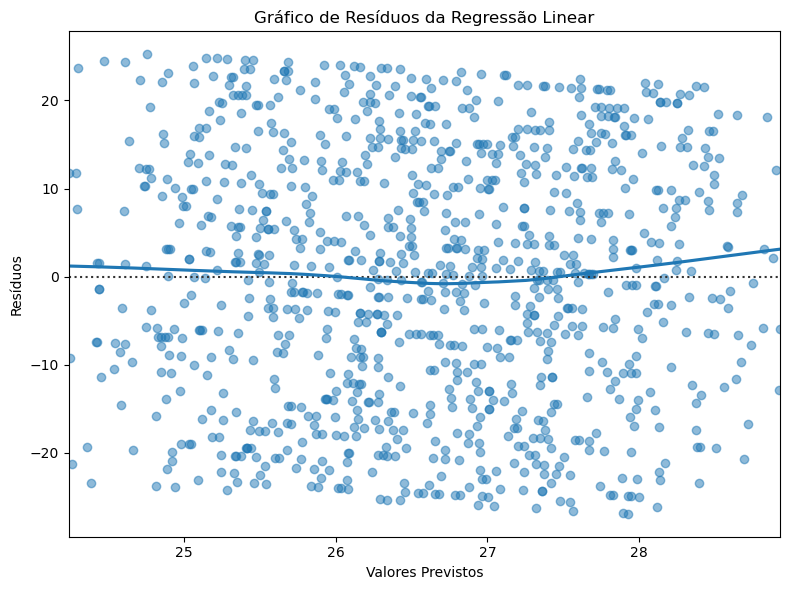

In [104]:
plt.figure(figsize=(8, 6))
sns.residplot(x=results.fittedvalues, y=results.resid, lowess=True, scatter_kws={'alpha': 0.5})
plt.title('Gráfico de Resíduos da Regressão Linear')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.grid(False)
plt.tight_layout()
plt.show()

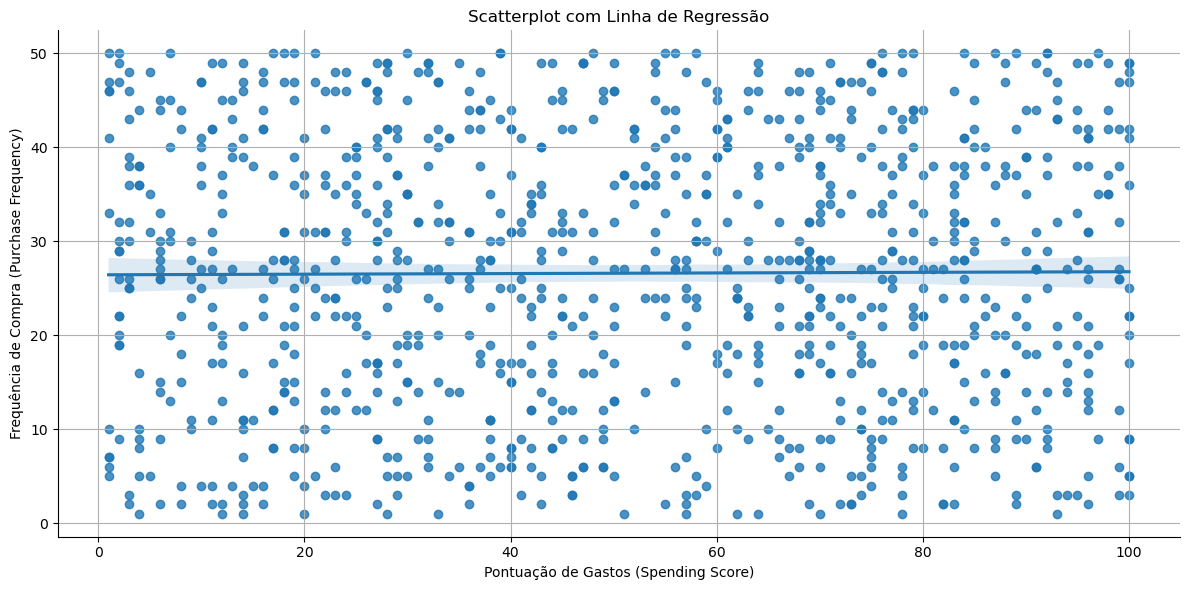

In [105]:
sns.lmplot(x='spending_score', y='purchase_frequency', data=df, aspect=2, height=6)
plt.title('Scatterplot com Linha de Regressão')
plt.xlabel('Pontuação de Gastos (Spending Score)')
plt.ylabel('Frequência de Compra (Purchase Frequency)')
plt.grid(True)
plt.tight_layout()
plt.show()

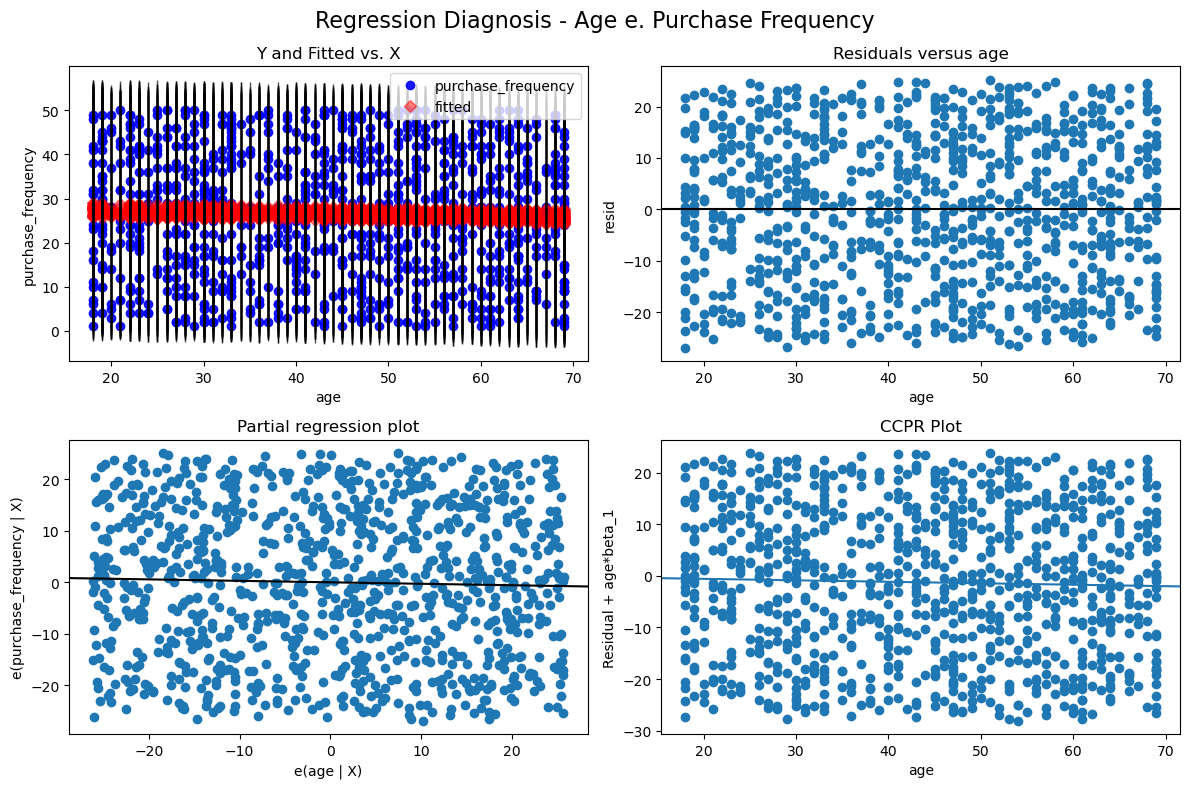

In [107]:
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(results, 'age', fig=fig)
plt.suptitle('Regression Diagnosis - Age e. Purchase Frequency', fontsize=16)
plt.tight_layout()
plt.show()